# USA House Prices Analysis & Prediction
The goal of this project is to explore and understand the factors influencing the real estate market in the United States and build machine learning models to accurately predict house prices.

During EDA, we aim to:

+ Identify key factors that influence house prices (e.g., location, size, number of rooms, year built).
+ Detect outliers and anomalies in the dataset.
+ Analyze the distribution of house prices and uncover trends.
+ Explore correlations between property features and prices.

> Source data: https://www.kaggle.com/datasets/farhankarim1/usa-house-prices

## Import libs

In [104]:
import pandas as pd
import seaborn as sns

## Import raw data

In [105]:
import os
import sys
from google.colab import drive
drive.mount('/content/drive')
project_path = "/content/drive/MyDrive/Pytorch pet projects/ML - Projects/ML - USA HOUSE PRICES"
sys.path.append(os.path.join(project_path, "src"))

df = pd.read_csv("/content/drive/MyDrive/Pytorch pet projects/ML - Projects/ML - USA HOUSE PRICES/data/raw/USA_Housing.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Discover data

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [107]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


## Generating New Features for Better Predictions
+ Address features in this form is not the most usable.
Creating new features base on ```Address```

In [108]:
print(f"Ther is {len(df.Address.unique())} unique value in the Address feature")

Ther is 5000 unique value in the Address feature


In [109]:
df.Address.value_counts(normalize=True)

,proportion
Address,
"208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101",0.0002
"314 Christopher Square Apt. 404\nLake Ronaldville, SD 42025",0.0002
"21042 Wilson Islands Suite 238\nFischerchester, MP 42425-4129",0.0002
Unit 8831 Box 5748\nDPO AE 73012-7314,0.0002
"481 Kaitlin Mission Apt. 309\nJodystad, IA 16947",0.0002
...,...
"054 Carter Crescent Suite 674\nGlennport, WA 11140",0.0002
"8460 Kathleen Mission Apt. 482\nPort Amytown, KY 72016",0.0002
"3737 Hartman Rue\nReneestad, ID 69250-7718",0.0002


In [110]:
# Split the Address to Steet and to the City+State+Zip
df[["Street", "CityStateZip"]] = df["Address"].str.split("\n", expand=True)
df[["City", "StateZip"]] = df["CityStateZip"].str.split(", ", expand=True)
df[["State", "Zip"]] = df["StateZip"].str.split(" ", n=1, expand=True)

# df.drop(columns=["Address", "CityStateZip", "StateZip"], axis=1, inplace=True)
df.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Street,CityStateZip,City,StateZip,State,Zip
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",208 Michael Ferry Apt. 674,"Laurabury, NE 37010-5101",Laurabury,NE 37010-5101,NE,37010-5101
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",188 Johnson Views Suite 079,"Lake Kathleen, CA 48958",Lake Kathleen,CA 48958,CA,48958
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",9127 Elizabeth Stravenue,"Danieltown, WI 06482-3489",Danieltown,WI 06482-3489,WI,06482-3489
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820,USS Barnett,FPO AP 44820,FPO AP 44820,None,None,None
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386,USNS Raymond,FPO AE 09386,FPO AE 09386,None,None,None


## Handling Missing Data
+ Because of our ```str.split``` ther is some missing data


In [111]:
df.isna().sum()

,0
Avg. Area Income,0
Avg. Area House Age,0
Avg. Area Number of Rooms,0
Avg. Area Number of Bedrooms,0
Area Population,0
Price,0
Address,0
Street,0
CityStateZip,0
City,0


In [113]:
df[df["StateZip"].isna() == True][["Address", "Street", "CityStateZip"]] # Az Address = \n => "Street", "CityStateZip"

,Address,Street,CityStateZip
3,USS Barnett\nFPO AP 44820,USS Barnett,FPO AP 44820
4,USNS Raymond\nFPO AE 09386,USNS Raymond,FPO AE 09386
8,USS Gilbert\nFPO AA 20957,USS Gilbert,FPO AA 20957
9,Unit 9446 Box 0958\nDPO AE 97025,Unit 9446 Box 0958,DPO AE 97025
14,"PSC 5330, Box 4420\nAPO AP 08302","PSC 5330, Box 4420",APO AP 08302
...,...,...,...
4985,"PSC 7442, Box 6234\nAPO AP 13017","PSC 7442, Box 6234",APO AP 13017
4992,Unit 2096 Box 9559\nDPO AE 80983-8797,Unit 2096 Box 9559,DPO AE 80983-8797
4995,USNS Williams\nFPO AP 30153-7653,USNS Williams,FPO AP 30153-7653
4996,"PSC 9258, Box 8489\nAPO AA 42991-3352","PSC 9258, Box 8489",APO AA 42991-3352


In [114]:
df[df["StateZip"].isna() == True][["CityStateZip", "City", "StateZip"]] # CityStateZip = , => "City", "StateZip"
# This is the reason why we have so many Nan values, If CityStateZip contains 'APO/FPO/DPO'
# addresses use a specific set of ZIP Codes assigned to military locations.

,CityStateZip,City,StateZip
3,FPO AP 44820,FPO AP 44820,None
4,FPO AE 09386,FPO AE 09386,None
8,FPO AA 20957,FPO AA 20957,None
9,DPO AE 97025,DPO AE 97025,None
14,APO AP 08302,APO AP 08302,None
...,...,...,...
4985,APO AP 13017,APO AP 13017,None
4992,DPO AE 80983-8797,DPO AE 80983-8797,None
4995,FPO AP 30153-7653,FPO AP 30153-7653,None
4996,APO AA 42991-3352,APO AA 42991-3352,None


In [115]:
df[~df["StateZip"].isna()]["CityStateZip"]

,CityStateZip
0,"Laurabury, NE 37010-5101"
1,"Lake Kathleen, CA 48958"
2,"Danieltown, WI 06482-3489"
5,"Tracyport, KS 16077"
6,"Nguyenburgh, CO 20247"
...,...
4991,"Amychester, GU 61734-5597"
4993,"South Alexstad, IL 42719-2498"
4994,"Nancystad, GA 16579"
4997,"Joshualand, VA 01707-9165"


In [120]:
# Lets check how many Military address do we have in the df
count = df["CityStateZip"].str.contains(r"\b(APO|FPO|DPO)\b", na=False).sum()
print(count)
# Here is the prof that all the 514 Nan is actually is a US military address.

514


<ipython-input-120-2923bec4e534>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  count = df["CityStateZip"].str.contains(r"\b(APO|FPO|DPO)\b", na=False).sum()


In [103]:
len(df), len(df.dropna(axis=1))

(5000, 5000)

In [88]:
df["State"] = df.groupby(["City", "Avg. Area Income"])["State"].apply(
    lambda x: x.fillna(x.mode().iloc[0] if not x.dropna().mode().empty else None)
).ffill().bfill().fillna("Unknown")


ValueError: Must specify a fill 'value' or 'method'.

In [89]:
df["State"] = df.groupby(["City", "Avg. Area Income"])["State"].transform(lambda x:x.fillna(x.dropna().mode().iloc[0] if not x.dropna().mode().empty else "Unknown"))
df["Zip"] = df.groupby(["City", "State"])["Zip"].transform(lambda x:x.fillna(x.mode()[0] if not x.mode().empty else -1))

<ipython-input-89-8e0d7ea8284b>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Zip"] = df.groupby(["City", "State"])["Zip"].transform(lambda x:x.fillna(x.mode()[0] if not x.mode().empty else -1))


In [90]:
df["State"].unique()

array(['NE', 'CA', 'WI', 'Unknown', 'KS', 'CO', 'TN', 'NM', 'PW', 'AR',
       'HI', 'ME', 'IN', 'MI', 'DE', 'AZ', 'MA', 'MN', 'AL', 'NY', 'NV',
       'VA', 'ID', 'OK', 'NH', 'MO', 'WV', 'WY', 'MH', 'UT', 'SD', 'CT',
       'AK', 'WA', 'RI', 'NJ', 'KY', 'NC', 'IA', 'VT', 'FM', 'ND', 'LA',
       'MP', 'OR', 'TX', 'DC', 'PR', 'MT', 'AS', 'OH', 'MS', 'IL', 'VI',
       'GA', 'PA', 'MD', 'SC', 'GU', 'FL'], dtype=object)

<Axes: xlabel='State', ylabel='count'>

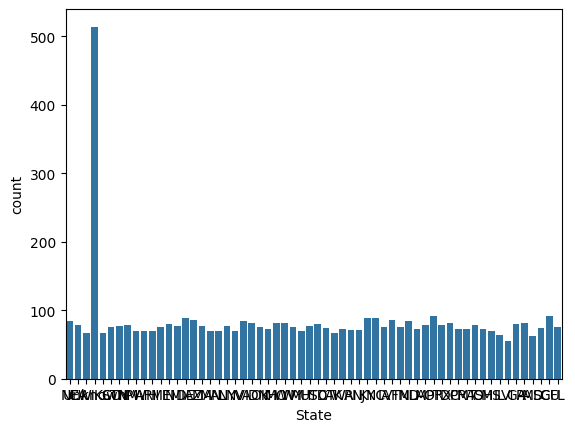

In [91]:
sns.countplot(x="State", data=df)

In [92]:
df["State"].value_counts(normalize=True)

,proportion
State,
Unknown,0.1028
GU,0.0182
OR,0.0182
NC,0.0178
DE,0.0178
KY,0.0178
AZ,0.0172
VT,0.0172
VA,0.0170
